In [67]:
%autoreload
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
%matplotlib inline
plt.style.use('fivethirtyeight') 
from numpy.random import normal, seed
from scipy.stats import norm
from datetime import datetime
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from sklearn.metrics import mean_squared_error
rcParams['figure.figsize'] = 10, 6
import os
import warnings
warnings.filterwarnings('ignore')
from plotly import tools
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import math
print(os.listdir("./"))

['.ipynb_checkpoints', 'historical-hourly-weather-data', 'stock-time-series-20050101-to-20171231', 'TS2.ipynb']


In [9]:
google = pd.read_csv('stock-time-series-20050101-to-20171231/GOOGL_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
google.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


In [10]:
humidity = pd.read_csv('historical-hourly-weather-data/humidity.csv',index_col='datetime', parse_dates=['datetime'])

In [11]:
humidity.tail()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,San Antonio,Dallas,Houston,Kansas City,Minneapolis,Saint Louis,Chicago,Nashville,Indianapolis,Atlanta,Detroit,Jacksonville,Charlotte,Miami,Pittsburgh,Toronto,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-11-29 20:00:00,NaN,81.0,NaN,93.0,24.0,72.0,18.0,68.0,37.0,18.0,37.0,45.0,68.0,32.0,31.0,32.0,52.0,32.0,32.0,82.0,39.0,47.0,21.0,NaN,20.0,45.0,27.0,NaN,64.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 21:00:00,NaN,71.0,NaN,87.0,21.0,72.0,18.0,73.0,34.0,12.0,35.0,42.0,73.0,27.0,31.0,37.0,65.0,34.0,32.0,73.0,39.0,47.0,21.0,NaN,23.0,48.0,29.0,NaN,59.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 22:00:00,NaN,71.0,NaN,93.0,23.0,68.0,17.0,60.0,32.0,15.0,38.0,42.0,50.0,27.0,30.0,37.0,96.0,36.0,39.0,77.0,42.0,53.0,24.0,NaN,27.0,52.0,31.0,NaN,66.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 23:00:00,NaN,71.0,NaN,87.0,14.0,63.0,17.0,33.0,30.0,28.0,37.0,45.0,49.0,30.0,35.0,46.0,75.0,39.0,52.0,82.0,52.0,73.0,38.0,NaN,36.0,64.0,26.0,NaN,58.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-30 00:00:00,NaN,76.0,NaN,75.0,56.0,72.0,17.0,23.0,34.0,31.0,48.0,42.0,52.0,32.0,38.0,46.0,86.0,41.0,52.0,100.0,56.0,88.0,41.0,NaN,42.0,60.0,32.0,NaN,58.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
humidity = humidity.iloc[1:]
humidity = humidity.fillna(method='ffill')
humidity.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,San Antonio,Dallas,Houston,Kansas City,Minneapolis,Saint Louis,Chicago,Nashville,Indianapolis,Atlanta,Detroit,Jacksonville,Charlotte,Miami,Pittsburgh,Toronto,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-10-01 13:00:00,76.0,81.0,88.0,81.0,88.0,82.0,22.0,23.0,50.0,62.0,93.0,87.0,93.0,71.0,67.0,71.0,71.0,100.0,76.0,94.0,76.0,88.0,87.0,83.0,93.0,82.0,71.0,58.0,93.0,68.0,50.0,63.0,22.0,51.0,51.0,50.0
2012-10-01 14:00:00,76.0,80.0,87.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,92.0,86.0,92.0,70.0,66.0,71.0,70.0,99.0,76.0,94.0,75.0,87.0,87.0,82.0,93.0,81.0,70.0,57.0,91.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 15:00:00,76.0,80.0,86.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,92.0,86.0,90.0,70.0,66.0,71.0,70.0,99.0,76.0,94.0,75.0,87.0,87.0,82.0,93.0,79.0,70.0,57.0,87.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 16:00:00,77.0,80.0,85.0,79.0,88.0,81.0,21.0,23.0,49.0,62.0,92.0,86.0,89.0,70.0,65.0,71.0,70.0,99.0,76.0,94.0,74.0,87.0,87.0,82.0,93.0,77.0,69.0,57.0,84.0,68.0,52.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 17:00:00,78.0,79.0,84.0,79.0,88.0,80.0,21.0,24.0,49.0,63.0,92.0,86.0,88.0,69.0,65.0,71.0,69.0,99.0,76.0,94.0,74.0,86.0,87.0,81.0,93.0,76.0,69.0,57.0,80.0,68.0,54.0,62.0,23.0,51.0,51.0,50.0


Text(0.5, 1.0, 'Humidity in Kansas City over time(Monthly frequency)')

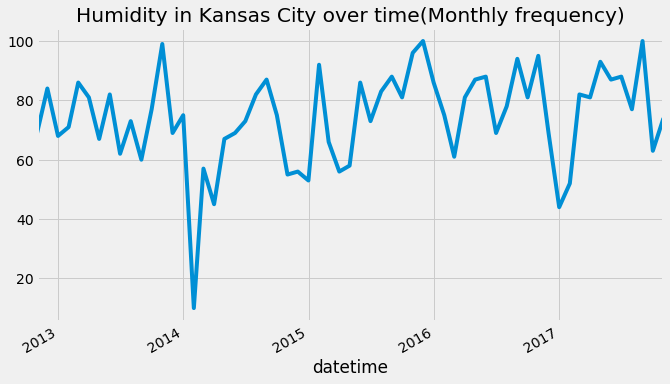

In [14]:
humidity["Kansas City"].asfreq('M').plot()
plt.title('Humidity in Kansas City over time(Monthly frequency)')

Text(0.5, 1.0, 'Google stock attributes from 2008 to 2010')

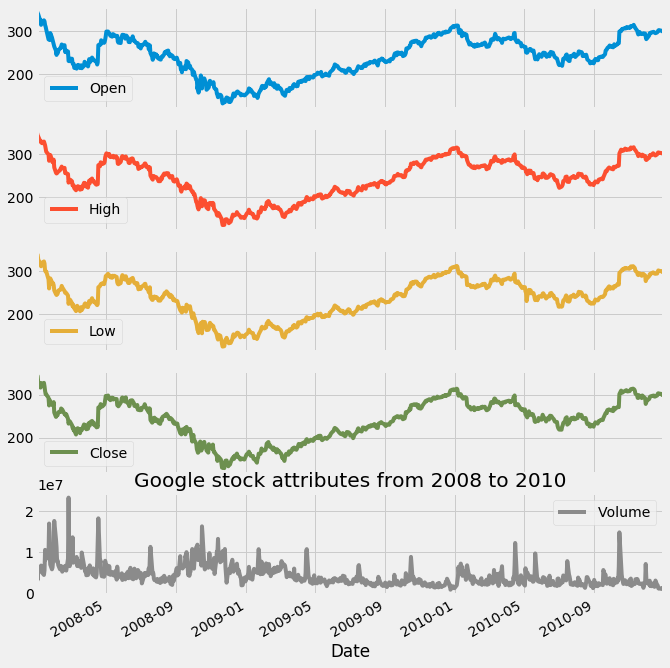

In [15]:
google['2008':'2010'].plot(subplots=True,figsize=(10,12))
plt.title('Google stock attributes from 2008 to 2010')

In [16]:
timestamp = pd.Timestamp(2017, 1, 1, 12)
timestamp

Timestamp('2017-01-01 12:00:00')

In [17]:
period = pd.Period('2017-01-01')
period

Period('2017-01-01', 'D')

In [18]:
period.start_time < timestamp < period.end_time

True

In [19]:
new_period = timestamp.to_period(freq='H')
new_period

Period('2017-01-01 12:00', 'H')

In [20]:
new_timestamp = period.to_timestamp(freq='H', how='start')
new_timestamp

Timestamp('2017-01-01 00:00:00')

In [21]:
dr1 = pd.date_range(start='1/1/18', end='1/9/18')
dr1

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09'],
              dtype='datetime64[ns]', freq='D')

In [22]:
dr2 = pd.date_range(start='1/1/18', end='1/1/19', freq='M')
dr2

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31'],
              dtype='datetime64[ns]', freq='M')

In [23]:
dr3 = pd.date_range(end='1/4/2014', periods=8)
dr3

DatetimeIndex(['2013-12-28', '2013-12-29', '2013-12-30', '2013-12-31',
               '2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04'],
              dtype='datetime64[ns]', freq='D')

In [24]:
dr4 = pd.date_range(start='2013-04-24', end='2014-11-27', periods=3)
dr4

DatetimeIndex(['2013-04-24', '2014-02-09', '2014-11-27'], dtype='datetime64[ns]', freq=None)

In [25]:
df = pd.DataFrame({'year': [2015, 2016], 'month': [2, 3], 'day': [4, 5]})
df

,year,month,day
0,2015,2,4
1,2016,3,5


In [26]:
df = pd.to_datetime(df)
df

0   2015-02-04
1   2016-03-05
dtype: datetime64[ns]

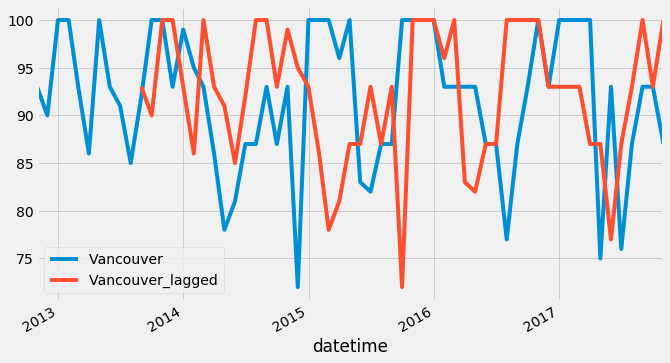

In [27]:
humidity["Vancouver"].asfreq('M').plot(legend=True)
shifted = humidity["Vancouver"].asfreq('M').shift(10).plot(legend=True)
shifted.legend(['Vancouver','Vancouver_lagged'])

In [28]:
pressure = pd.read_csv('historical-hourly-weather-data/pressure.csv', index_col='datetime', parse_dates=['datetime'])

In [29]:
pressure.tail()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,San Antonio,Dallas,Houston,Kansas City,Minneapolis,Saint Louis,Chicago,Nashville,Indianapolis,Atlanta,Detroit,Jacksonville,Charlotte,Miami,Pittsburgh,Toronto,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-11-29 20:00:00,NaN,1031.0,NaN,1030.0,1016.0,1017.0,1021.0,1018.0,1025.0,1016.0,1022.0,1021.0,1021.0,1020.0,1018.0,1023.0,1025.0,1023.0,1025.0,1024.0,1027.0,1021.0,1023.0,NaN,1024.0,1026.0,1021.0,NaN,1021.0,1017.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 21:00:00,NaN,1030.0,NaN,1030.0,1016.0,1017.0,1020.0,1018.0,1024.0,1018.0,1021.0,1021.0,1021.0,1021.0,1017.0,1022.0,1024.0,1022.0,1024.0,1023.0,1027.0,1021.0,1023.0,NaN,1024.0,1026.0,1021.0,NaN,1023.0,1019.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 22:00:00,NaN,1030.0,NaN,1029.0,1015.0,1016.0,1020.0,1017.0,1024.0,1018.0,1021.0,1021.0,1020.0,1020.0,1016.0,1021.0,1024.0,1023.0,1024.0,1023.0,1027.0,1022.0,1023.0,NaN,1024.0,1026.0,1022.0,NaN,1024.0,1019.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 23:00:00,NaN,1029.0,NaN,1028.0,1016.0,1016.0,1020.0,1016.0,1024.0,1020.0,1021.0,1021.0,1020.0,1019.0,1015.0,1021.0,1023.0,1023.0,1024.0,1023.0,1027.0,1022.0,1023.0,NaN,1024.0,1027.0,1023.0,NaN,1026.0,1022.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-30 00:00:00,NaN,1029.0,NaN,1028.0,1015.0,1017.0,1019.0,1016.0,1024.0,1021.0,1021.0,1021.0,1020.0,1019.0,1016.0,1021.0,1023.0,1023.0,1023.0,1024.0,1027.0,1022.0,1024.0,NaN,1025.0,1027.0,1024.0,NaN,1027.0,1023.0,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
pressure = pressure.iloc[1:]
pressure = pressure.fillna(method='ffill')
pressure.tail()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,San Antonio,Dallas,Houston,Kansas City,Minneapolis,Saint Louis,Chicago,Nashville,Indianapolis,Atlanta,Detroit,Jacksonville,Charlotte,Miami,Pittsburgh,Toronto,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-11-29 20:00:00,1021.0,1031.0,1013.0,1030.0,1016.0,1017.0,1021.0,1018.0,1025.0,1016.0,1022.0,1021.0,1021.0,1020.0,1018.0,1023.0,1025.0,1023.0,1025.0,1024.0,1027.0,1021.0,1023.0,1015.0,1024.0,1026.0,1021.0,1020.0,1021.0,1017.0,984.0,1011.0,968.0,1023.0,1023.0,1011.0
2017-11-29 21:00:00,1021.0,1030.0,1013.0,1030.0,1016.0,1017.0,1020.0,1018.0,1024.0,1018.0,1021.0,1021.0,1021.0,1021.0,1017.0,1022.0,1024.0,1022.0,1024.0,1023.0,1027.0,1021.0,1023.0,1015.0,1024.0,1026.0,1021.0,1020.0,1023.0,1019.0,984.0,1011.0,968.0,1023.0,1023.0,1011.0
2017-11-29 22:00:00,1021.0,1030.0,1013.0,1029.0,1015.0,1016.0,1020.0,1017.0,1024.0,1018.0,1021.0,1021.0,1020.0,1020.0,1016.0,1021.0,1024.0,1023.0,1024.0,1023.0,1027.0,1022.0,1023.0,1015.0,1024.0,1026.0,1022.0,1020.0,1024.0,1019.0,984.0,1011.0,968.0,1023.0,1023.0,1011.0
2017-11-29 23:00:00,1021.0,1029.0,1013.0,1028.0,1016.0,1016.0,1020.0,1016.0,1024.0,1020.0,1021.0,1021.0,1020.0,1019.0,1015.0,1021.0,1023.0,1023.0,1024.0,1023.0,1027.0,1022.0,1023.0,1015.0,1024.0,1027.0,1023.0,1020.0,1026.0,1022.0,984.0,1011.0,968.0,1023.0,1023.0,1011.0
2017-11-30 00:00:00,1021.0,1029.0,1013.0,1028.0,1015.0,1017.0,1019.0,1016.0,1024.0,1021.0,1021.0,1021.0,1020.0,1019.0,1016.0,1021.0,1023.0,1023.0,1023.0,1024.0,1027.0,1022.0,1024.0,1015.0,1025.0,1027.0,1024.0,1020.0,1027.0,1023.0,984.0,1011.0,968.0,1023.0,1023.0,1011.0


In [31]:
pressure = pressure.fillna(method='bfill')
pressure.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,San Antonio,Dallas,Houston,Kansas City,Minneapolis,Saint Louis,Chicago,Nashville,Indianapolis,Atlanta,Detroit,Jacksonville,Charlotte,Miami,Pittsburgh,Toronto,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-10-01 13:00:00,807.0,1024.0,1009.0,1027.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,1014.0,1011.0,1009.0,1011.0,1012.0,1010.0,1014.0,1005.0,1011.0,1006.0,1016.0,1009.0,1012.0,1011.0,1015.0,1012.0,1014.0,1012.0,1001.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 14:00:00,807.0,1024.0,1009.0,1027.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,1014.0,1011.0,1008.0,1011.0,1012.0,1010.0,1014.0,1004.0,1011.0,1006.0,1015.0,1009.0,1012.0,1011.0,1015.0,1011.0,1014.0,1012.0,986.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 15:00:00,807.0,1024.0,1009.0,1028.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,1014.0,1011.0,1008.0,1011.0,1012.0,1010.0,1014.0,1004.0,1011.0,1006.0,1015.0,1009.0,1012.0,1011.0,1015.0,1011.0,1014.0,1012.0,945.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 16:00:00,807.0,1024.0,1009.0,1028.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,1014.0,1011.0,1008.0,1011.0,1012.0,1010.0,1014.0,1004.0,1011.0,1006.0,1015.0,1009.0,1012.0,1011.0,1015.0,1010.0,1014.0,1012.0,904.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 17:00:00,807.0,1024.0,1009.0,1029.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,1014.0,1011.0,1008.0,1011.0,1012.0,1010.0,1014.0,1004.0,1011.0,1006.0,1015.0,1009.0,1012.0,1011.0,1015.0,1010.0,1014.0,1012.0,863.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0


In [32]:
pressure.shape

(45252, 36)

In [33]:
pressure = pressure.resample('3D').mean()
pressure.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,San Antonio,Dallas,Houston,Kansas City,Minneapolis,Saint Louis,Chicago,Nashville,Indianapolis,Atlanta,Detroit,Jacksonville,Charlotte,Miami,Pittsburgh,Toronto,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-10-01,931.627119,1022.644068,1010.881356,1031.271186,1011.627119,1011.966102,1016.322034,1012.084746,1022.542373,1024.118644,1014.305085,1011.525424,1009.881356,1011.915254,1012.949153,1009.525424,1012.372881,1004.627119,1008.949153,1006.593220,1013.661017,1009.271186,1011.372881,1011.915254,1012.745763,1005.711864,1014.152542,1013.423729,937.627119,1013.677966,985.050847,1012.949153,1011.796610,1013.000000,1013.000000,990.525424
2012-10-04,1019.083333,1023.041667,1014.694444,1028.305556,1015.555556,1016.277778,1013.194444,1014.097222,1019.972222,1020.666667,1017.708333,1016.416667,1017.652778,1017.305556,1015.111111,1018.388889,1015.875000,1020.652778,1018.388889,1021.430556,1017.277778,1020.000000,1021.222222,1018.500000,1019.069444,1006.958333,1018.097222,1017.680556,1017.180556,1019.805556,984.930556,1013.083333,1012.611111,1013.000000,1013.000000,990.083333
2012-10-07,1013.930556,1017.444444,1016.597222,1018.736111,1013.416667,1014.222222,1012.888889,1011.861111,1005.833333,1020.458333,1020.402778,1022.819444,1018.791667,1022.986111,1017.388889,1023.111111,1020.569444,1021.111111,1021.180556,1017.791667,1019.388889,1015.347222,1017.833333,1013.958333,1018.625000,1007.694444,1017.958333,1016.750000,1014.152778,1016.305556,982.972222,1013.027778,1007.555556,1013.000000,1013.000000,989.833333
2012-10-10,1015.000000,1015.430556,1014.833333,1018.416667,1010.694444,1014.013889,1000.166667,1005.611111,986.000000,984.486111,1015.236111,1016.277778,1017.791667,1014.611111,1009.625000,1019.069444,1015.458333,1019.333333,1017.208333,1018.208333,1015.708333,1018.625000,1019.513889,1016.222222,1015.611111,1007.541667,1018.694444,1017.916667,1016.166667,1017.319444,979.763889,1006.527778,998.763889,1012.333333,1012.333333,987.888889
2012-10-13,1008.152778,1018.111111,1021.069444,1015.930556,1017.277778,1018.375000,1015.666667,1015.500000,1013.625000,1010.444444,1017.611111,1016.555556,1017.972222,1013.680556,1014.763889,1016.805556,1016.347222,1021.388889,1018.708333,1023.305556,1019.472222,1021.569444,1025.500000,1017.333333,1021.375000,1016.097222,1025.055556,1024.388889,1020.805556,1023.736111,984.527778,1013.027778,1007.194444,1013.000000,1013.000000,990.430556


In [35]:
pressure.shape

(629, 36)

In [36]:
pressure = pressure.resample('D').pad()
pressure.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,San Antonio,Dallas,Houston,Kansas City,Minneapolis,Saint Louis,Chicago,Nashville,Indianapolis,Atlanta,Detroit,Jacksonville,Charlotte,Miami,Pittsburgh,Toronto,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-10-01,931.627119,1022.644068,1010.881356,1031.271186,1011.627119,1011.966102,1016.322034,1012.084746,1022.542373,1024.118644,1014.305085,1011.525424,1009.881356,1011.915254,1012.949153,1009.525424,1012.372881,1004.627119,1008.949153,1006.593220,1013.661017,1009.271186,1011.372881,1011.915254,1012.745763,1005.711864,1014.152542,1013.423729,937.627119,1013.677966,985.050847,1012.949153,1011.796610,1013.0,1013.0,990.525424
2012-10-02,931.627119,1022.644068,1010.881356,1031.271186,1011.627119,1011.966102,1016.322034,1012.084746,1022.542373,1024.118644,1014.305085,1011.525424,1009.881356,1011.915254,1012.949153,1009.525424,1012.372881,1004.627119,1008.949153,1006.593220,1013.661017,1009.271186,1011.372881,1011.915254,1012.745763,1005.711864,1014.152542,1013.423729,937.627119,1013.677966,985.050847,1012.949153,1011.796610,1013.0,1013.0,990.525424
2012-10-03,931.627119,1022.644068,1010.881356,1031.271186,1011.627119,1011.966102,1016.322034,1012.084746,1022.542373,1024.118644,1014.305085,1011.525424,1009.881356,1011.915254,1012.949153,1009.525424,1012.372881,1004.627119,1008.949153,1006.593220,1013.661017,1009.271186,1011.372881,1011.915254,1012.745763,1005.711864,1014.152542,1013.423729,937.627119,1013.677966,985.050847,1012.949153,1011.796610,1013.0,1013.0,990.525424
2012-10-04,1019.083333,1023.041667,1014.694444,1028.305556,1015.555556,1016.277778,1013.194444,1014.097222,1019.972222,1020.666667,1017.708333,1016.416667,1017.652778,1017.305556,1015.111111,1018.388889,1015.875000,1020.652778,1018.388889,1021.430556,1017.277778,1020.000000,1021.222222,1018.500000,1019.069444,1006.958333,1018.097222,1017.680556,1017.180556,1019.805556,984.930556,1013.083333,1012.611111,1013.0,1013.0,990.083333
2012-10-05,1019.083333,1023.041667,1014.694444,1028.305556,1015.555556,1016.277778,1013.194444,1014.097222,1019.972222,1020.666667,1017.708333,1016.416667,1017.652778,1017.305556,1015.111111,1018.388889,1015.875000,1020.652778,1018.388889,1021.430556,1017.277778,1020.000000,1021.222222,1018.500000,1019.069444,1006.958333,1018.097222,1017.680556,1017.180556,1019.805556,984.930556,1013.083333,1012.611111,1013.0,1013.0,990.083333


In [37]:
pressure.shape

(1885, 36)

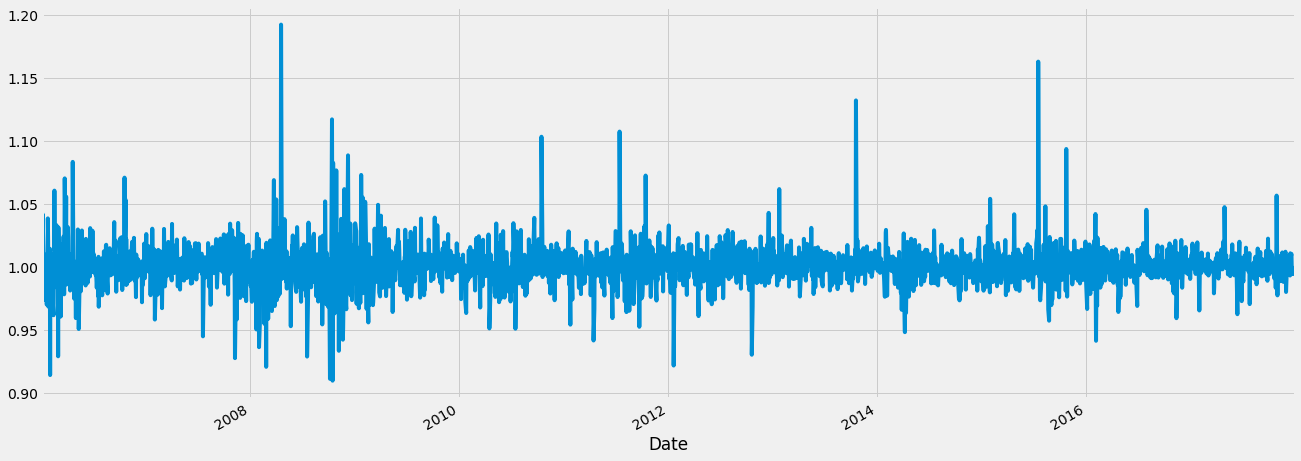

In [38]:
google['Change'] = google.High.div(google.High.shift())
google['Change'].plot(figsize=(20,8))

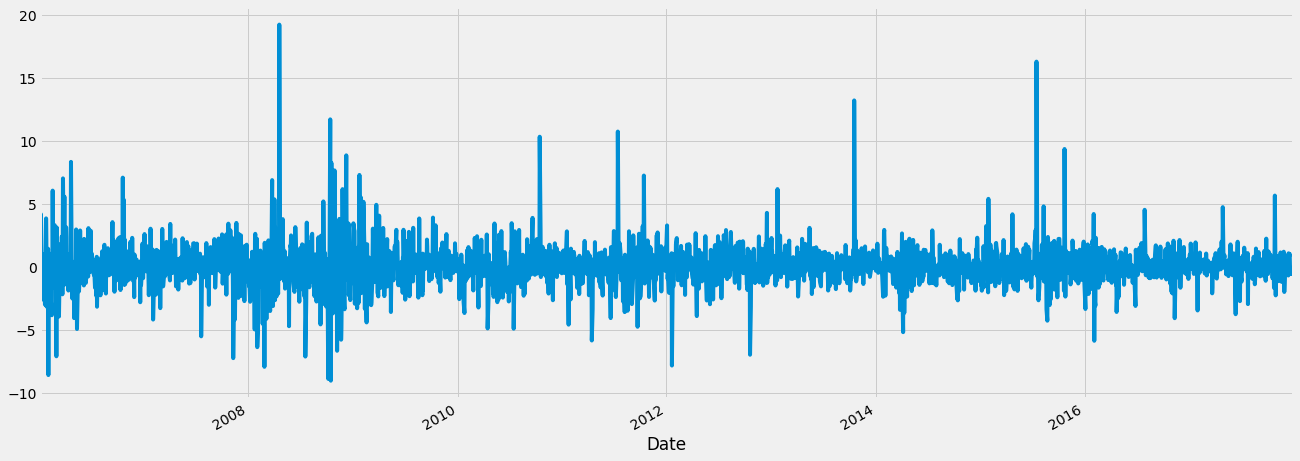

In [39]:
google['Return'] = google.Change.sub(1).mul(100)
google['Return'].plot(figsize=(20,8))

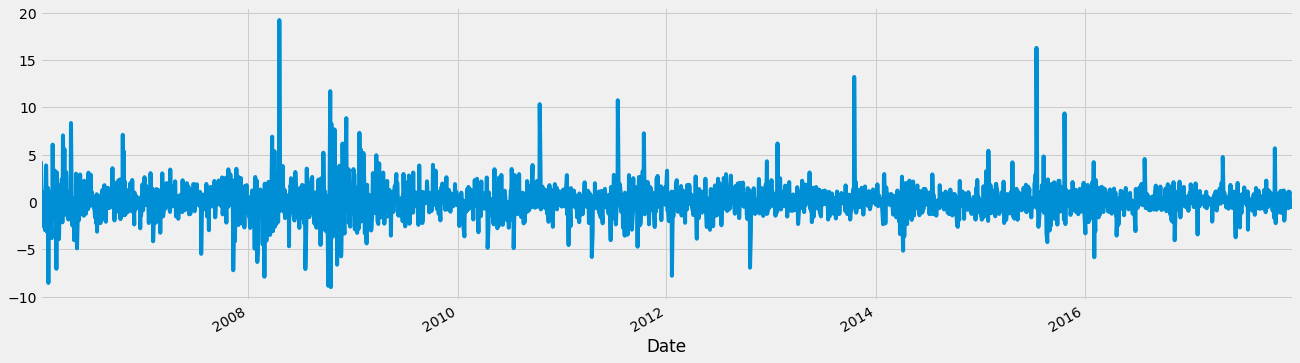

In [40]:
google.High.pct_change().mul(100).plot(figsize=(20,6)) # Another way to calculate returns

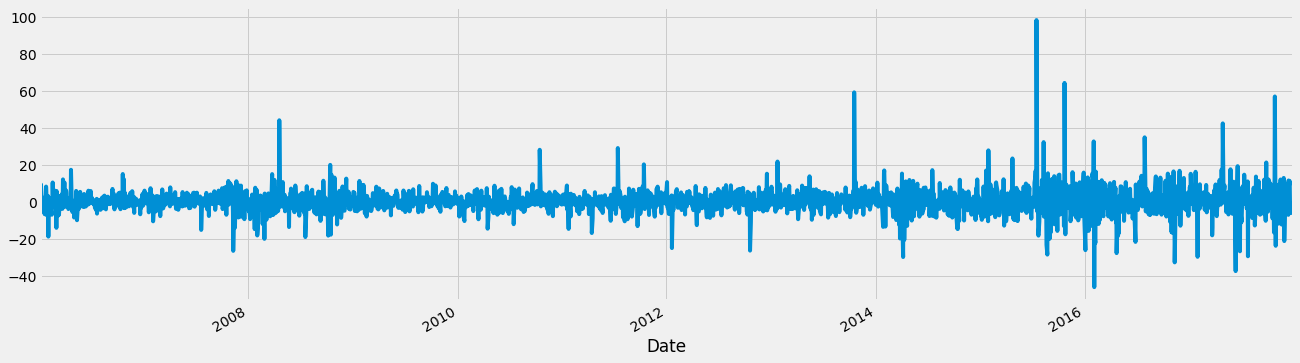

In [41]:
google.High.diff().plot(figsize=(20,6))

In [42]:
microsoft = pd.read_csv('stock-time-series-20050101-to-20171231/MSFT_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])

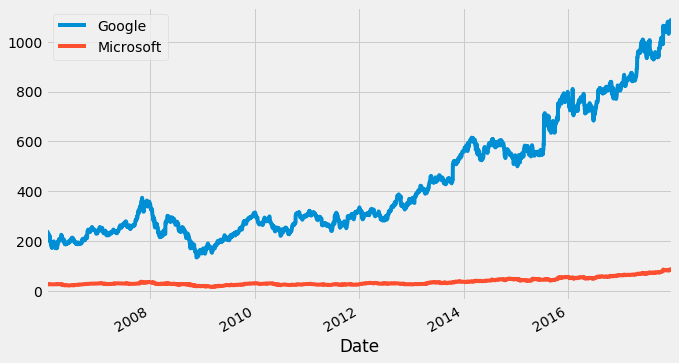

In [43]:
google.High.plot()
microsoft.High.plot()
plt.legend(['Google','Microsoft'])
plt.show()

#### It can be seen as creating an equal fair ground for both companies to start

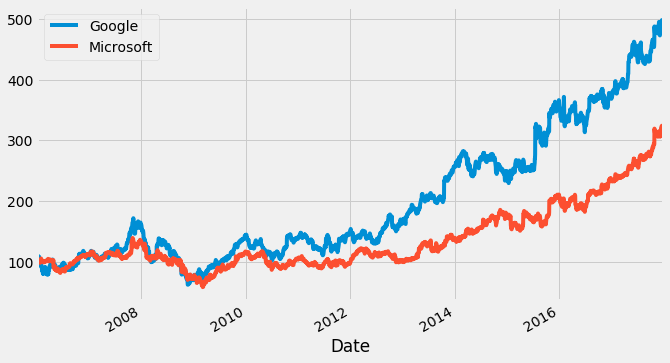

In [44]:
normalized_google = google.High.div(google.High.iloc[0]).mul(100)
normalized_microsoft = microsoft.High.div(microsoft.High.iloc[0]).mul(100)
normalized_google.plot()
normalized_microsoft.plot()
plt.legend(['Google','Microsoft'])
plt.show()

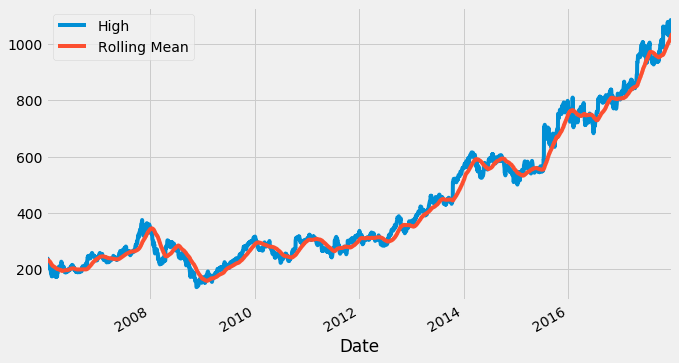

In [45]:
rolling_google = google.High.rolling('90D').mean()
google.High.plot()
rolling_google.plot()
plt.legend(['High','Rolling Mean'])

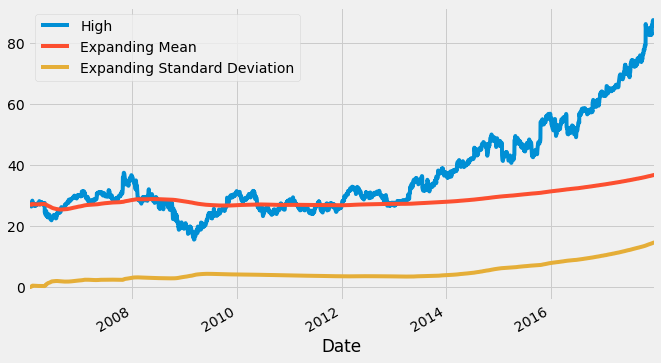

In [46]:
microsoft_mean = microsoft.High.expanding().mean()
microsoft_std = microsoft.High.expanding().std()
microsoft.High.plot()
microsoft_mean.plot()
microsoft_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])

In [47]:
trace = go.Ohlc(x=google['06-2008'].index,
                open=google['06-2008'].Open,
                high=google['06-2008'].High,
                low=google['06-2008'].Low,
                close=google['06-2008'].Close)
data = [trace]
iplot(data, filename='simple_ohlc')

In [48]:
trace = go.Ohlc(x=google['2008'].index,
                open=google['2008'].Open,
                high=google['2008'].High,
                low=google['2008'].Low,
                close=google['2008'].Close)
data = [trace]
iplot(data, filename='simple_ohlc')

In [49]:
trace = go.Ohlc(x=google.index,
                open=google.Open,
                high=google.High,
                low=google.Low,
                close=google.Close)
data = [trace]
iplot(data, filename='simple_ohlc')

In [50]:
trace = go.Candlestick(x=google['03-2008'].index,
                open=google['03-2008'].Open,
                high=google['03-2008'].High,
                low=google['03-2008'].Low,
                close=google['03-2008'].Close)
data = [trace]
iplot(data, filename='simple_candlestick')

In [51]:
trace = go.Candlestick(x=google['2008'].index,
                open=google['2008'].Open,
                high=google['2008'].High,
                low=google['2008'].Low,
                close=google['2008'].Close)
data = [trace]
iplot(data, filename='simple_candlestick')

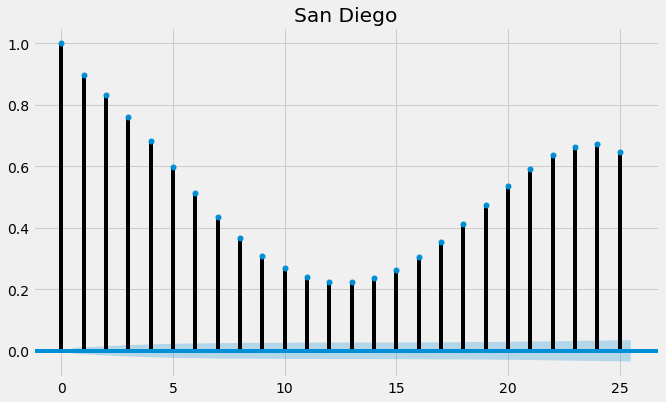

In [52]:
plot_acf(humidity["San Diego"],lags=25,title="San Diego")
plt.show()

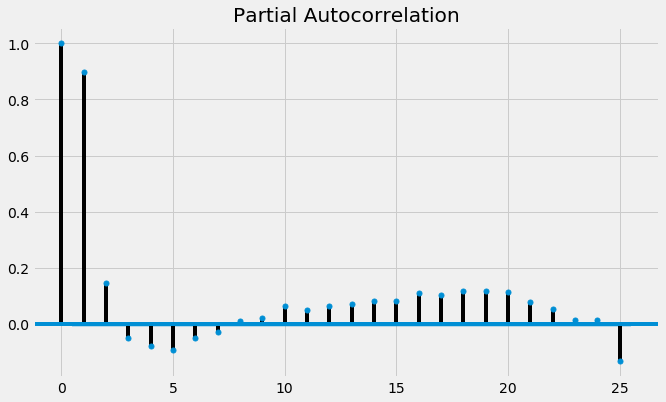

In [53]:
plot_pacf(humidity["San Diego"],lags=25)
plt.show()

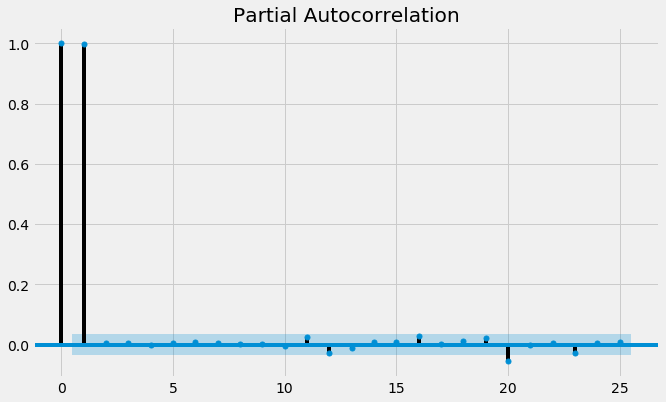

In [54]:
plot_pacf(microsoft["Close"],lags=25)
plt.show()

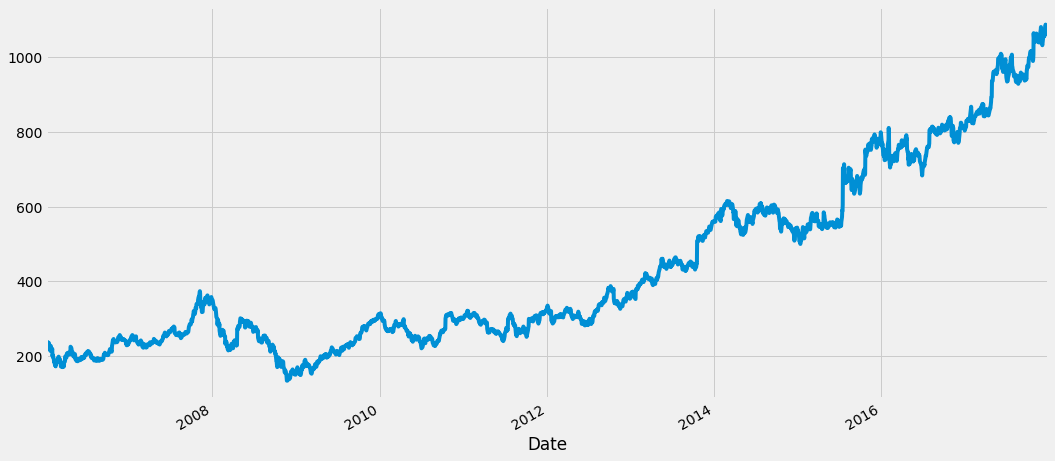

In [55]:
google["High"].plot(figsize=(16,8))

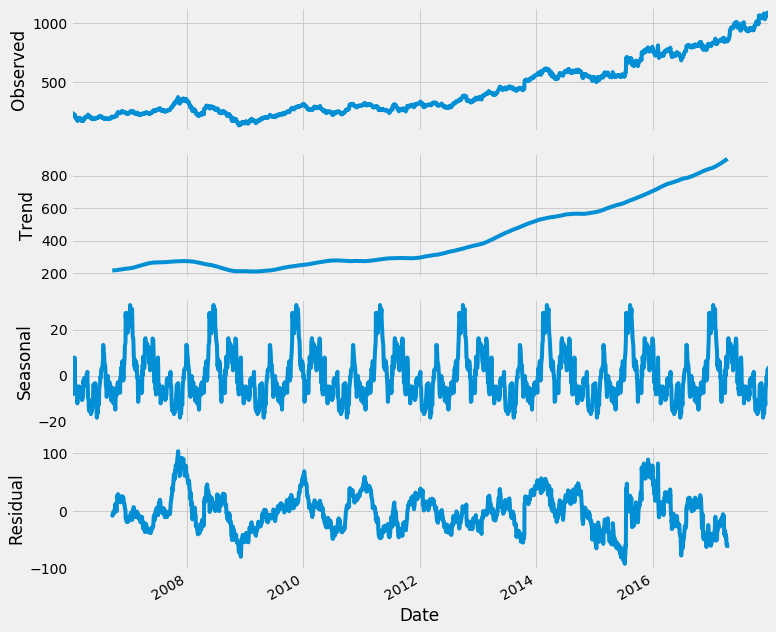

In [56]:
rcParams['figure.figsize'] = 11, 9
decomposed_google_volume = sm.tsa.seasonal_decompose(google["High"],freq=360) # The frequncy is annual
figure = decomposed_google_volume.plot()
plt.show()

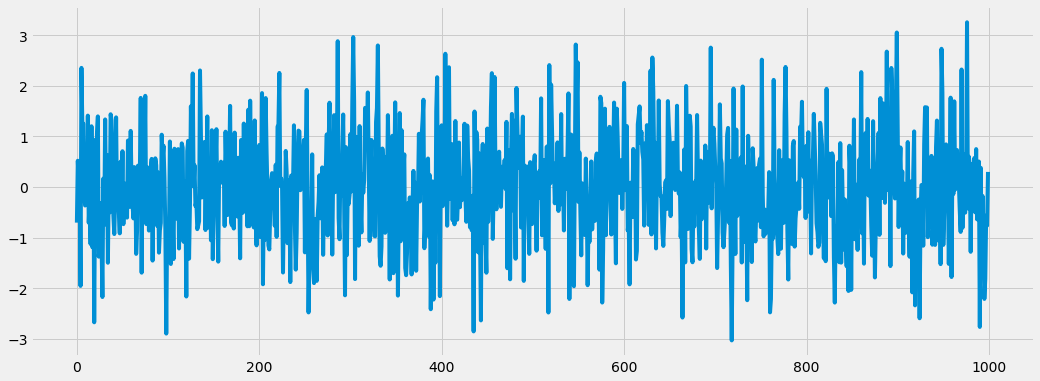

In [57]:
rcParams['figure.figsize'] = 16, 6
white_noise = np.random.normal(loc=0, scale=1, size=1000)
plt.plot(white_noise)

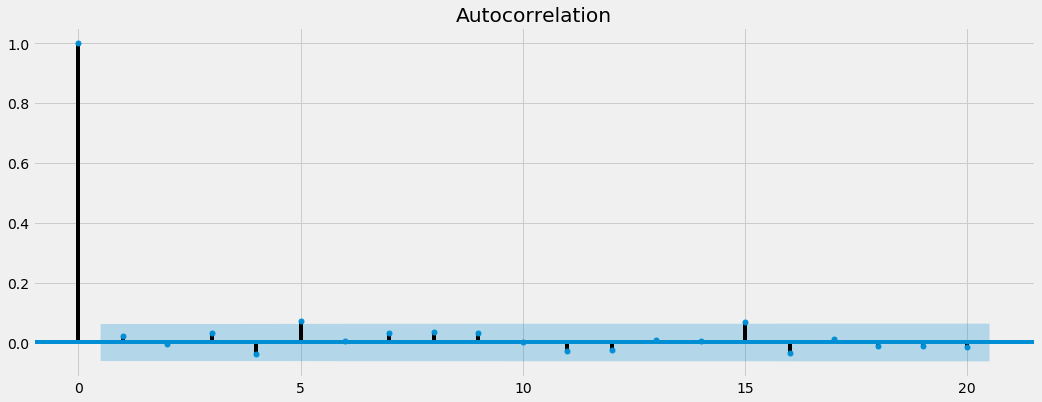

In [59]:
plot_acf(white_noise,lags=20)
plt.show()

In [60]:
adf = adfuller(microsoft["Volume"])
print("p-value of microsoft: {}".format(float(adf[1])))
adf = adfuller(google["Volume"])
print("p-value of google: {}".format(float(adf[1])))

p-value of microsoft: 0.00032015252776519996
p-value of google: 6.510719605768313e-07


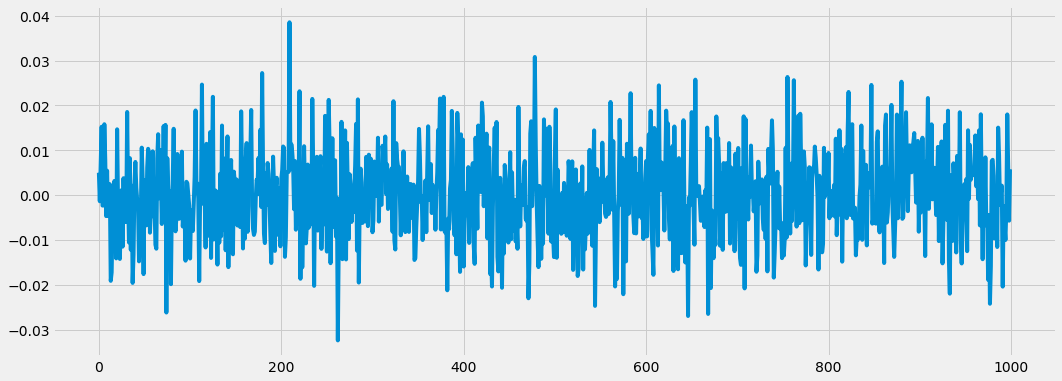

In [61]:
seed(42)
rcParams['figure.figsize'] = 16, 6
random_walk = normal(loc=0, scale=0.01, size=1000)
plt.plot(random_walk)
plt.show()

In [62]:
fig = ff.create_distplot([random_walk],['Random Walk'],bin_size=0.001)
iplot(fig, filename='Basic Distplot')

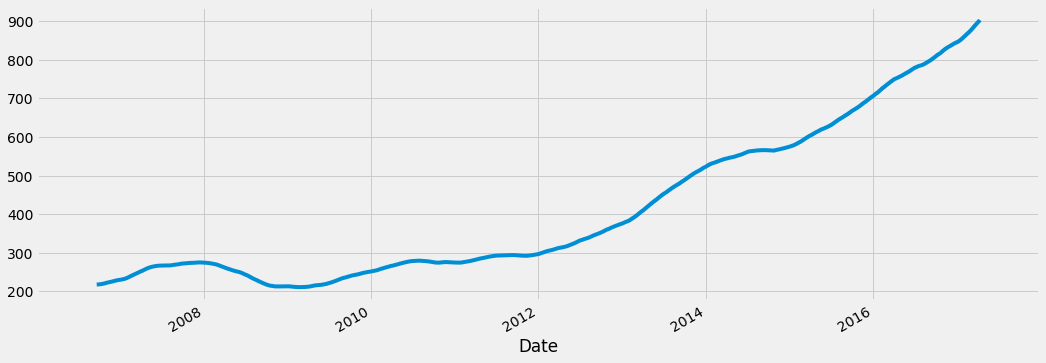

In [63]:
decomposed_google_volume.trend.plot()

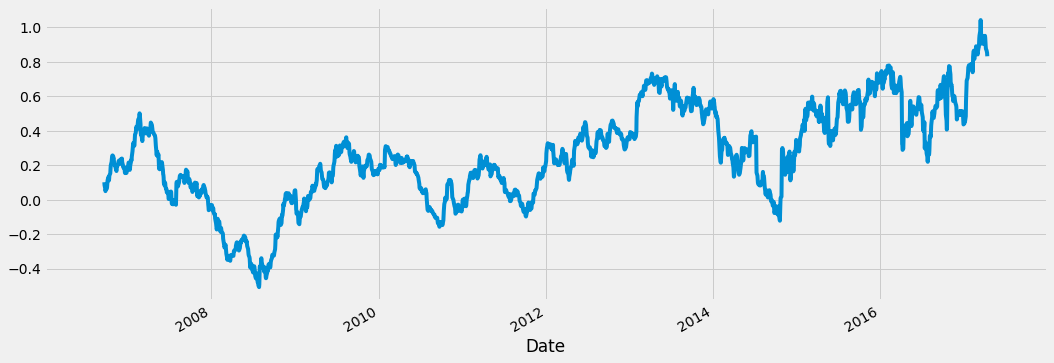

In [64]:
decomposed_google_volume.trend.diff().plot()

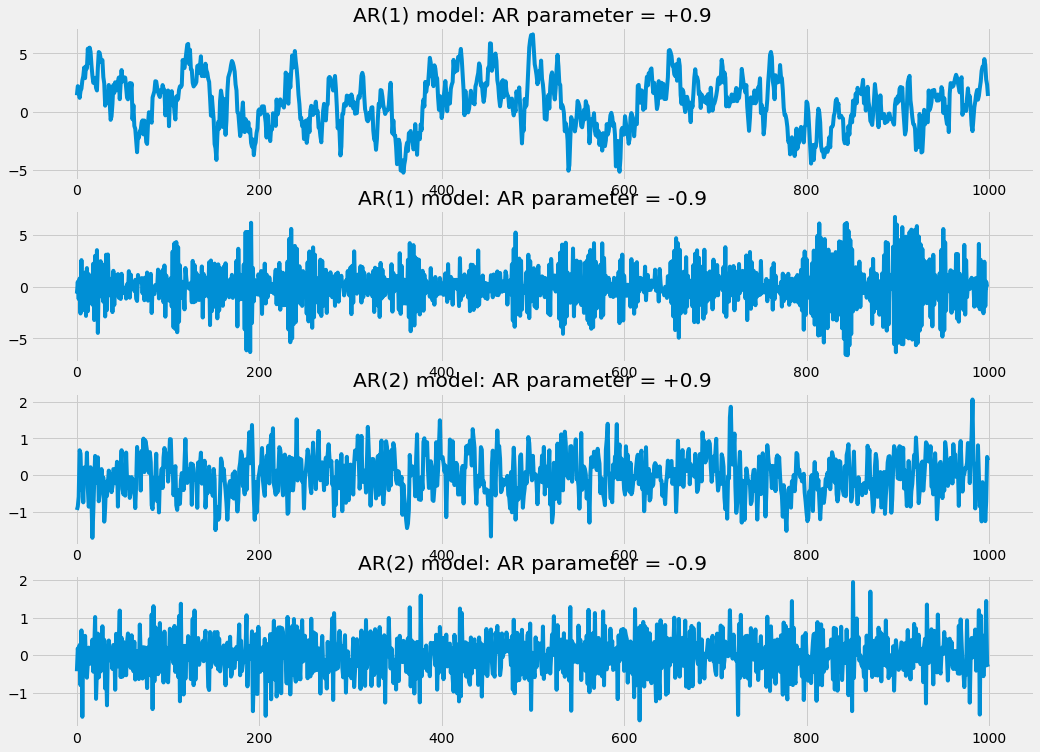

In [73]:
rcParams['figure.figsize'] = 16, 12
plt.subplot(4,1,1)
ar1 = np.array([1, -0.9]) 
ma1 = np.array([1])
AR1 = ArmaProcess(ar1, ma1)
sim1 = AR1.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = +0.9')
plt.plot(sim1)

plt.subplot(4,1,2)
ar2 = np.array([1, 0.9]) 
ma2 = np.array([1])
AR2 = ArmaProcess(ar2, ma2)
sim2 = AR2.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = -0.9')
plt.plot(sim2)

plt.subplot(4,1,3)
ar3 = np.array([2, -0.9])
ma3 = np.array([1])
AR3 = ArmaProcess(ar3, ma3)
sim3 = AR3.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = +0.9')
plt.plot(sim3)

plt.subplot(4,1,4)
ar4 = np.array([2, 0.9])
ma4 = np.array([1])
AR4 = ArmaProcess(ar4, ma4)
sim4 = AR4.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = -0.9')
plt.plot(sim4)
plt.show()

In [74]:
model = ARMA(sim1, order=(1,0))
result = model.fit()
print(result.summary())
print("μ={} ,ϕ={}".format(result.params[0],result.params[1]))

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1415.701
Method:                       css-mle   S.D. of innovations              0.996
Date:                Mon, 15 Jul 2019   AIC                           2837.403
Time:                        16:14:12   BIC                           2852.126
Sample:                             0   HQIC                          2842.998
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7072      0.288      2.454      0.014       0.142       1.272
ar.L1.y        0.8916      0.014     62.742      0.000       0.864       0.919
                                    Roots           

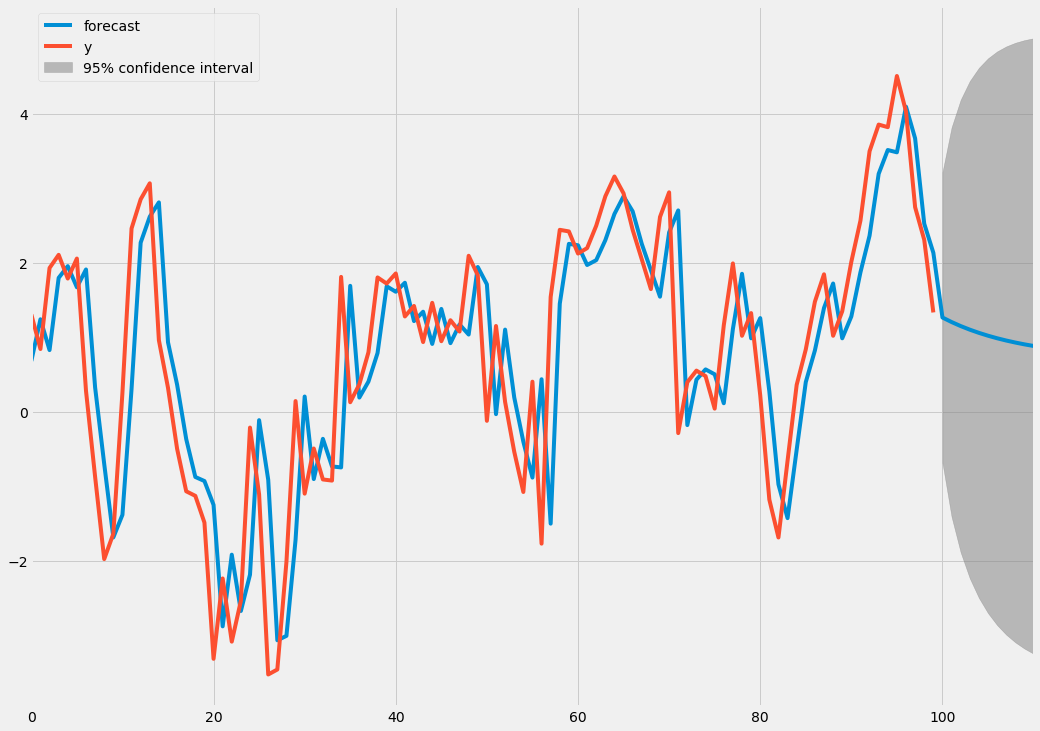

In [75]:
result.plot_predict(start=900, end=1010)
plt.show()

In [77]:
rmse = math.sqrt(mean_squared_error(sim1[900:1011], result.predict(start=900,end=999)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 1.0408054468092558.


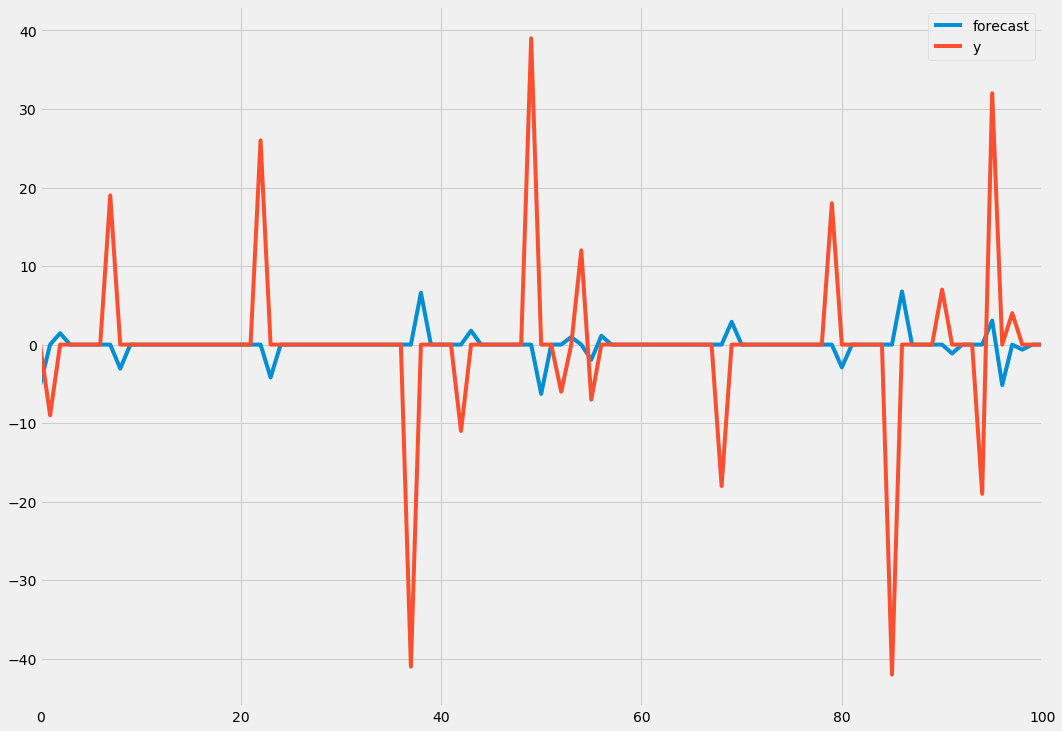

In [78]:
humid = ARMA(humidity["Montreal"].diff().iloc[1:].values, order=(1,0))
res = humid.fit()
res.plot_predict(start=1000, end=1100)
plt.show()